# Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import RandomizedSearchCV
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
from DataPreprocessing import *

# Random Forest without Hyperparameters Tuning

In [3]:
# Random Forest
Rf = RandomForestRegressor()

Rf.fit(X_train_std, y_train)

Rf_train_pred = Rf.predict(X_train_std)
Rf_test_pred = Rf.predict(X_test_std)

r2_score_train = metrics.r2_score(y_train, Rf_train_pred)
r2_score_test = metrics.r2_score(y_test, Rf_test_pred)

print('RMSE on the train set:', np.sqrt(metrics.mean_squared_error(y_test, Rf_test_pred)))
print('RMSE on the test set:', np.sqrt(metrics.mean_squared_error(y_test, Rf_test_pred)))
print(f"Accuracy on the test set: R Square: {r2_score_train}")
print(f"Accuracy on the test set: R Square: {r2_score_test}")

RMSE on the train set: 180092.51344278656
RMSE on the test set: 180092.51344278656
Accuracy on the test set: R Square: 0.987888089500784
Accuracy on the test set: R Square: 0.8820031788413284


In [4]:
# get importance
importances = Rf.feature_importances_

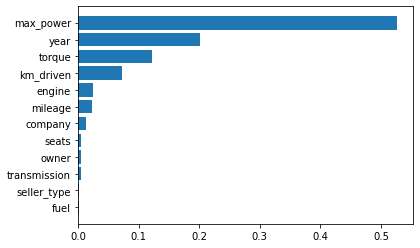

In [5]:
indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

# Hyperparameters Tuning

In [6]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [7]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_std, y_train)
best_random = rf_random.best_estimator_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [8]:
rf_train_pred = best_random.predict(X_train_std)
rf_test_pred = best_random.predict(X_test_std)

R2_score_train = metrics.r2_score(y_train, rf_train_pred)
R2_score_test = metrics.r2_score(y_test, rf_test_pred)

print('RMSE on the train set after tuning:', np.sqrt(metrics.mean_squared_error(y_test, rf_test_pred)))
print('RMSE on the test set after tuning:', np.sqrt(metrics.mean_squared_error(y_test, rf_test_pred)))
print(f"Accuracy on the test set after tuning: R Square: {R2_score_train}")
print(f"Accuracy on the test set after tuning: R Square: {R2_score_test}")

RMSE on the train set after tuning: 178483.81548974745
RMSE on the test set after tuning: 178483.81548974745
Accuracy on the test set after tuning: R Square: 0.9785227660921533
Accuracy on the test set after tuning: R Square: 0.8841018051589403


# Prediction

In [9]:
X_test_predict = X_test_std[0:3]
X_test_predict

array([[ 1.38954455, -1.08145768,  1.11558082,  0.30072914, -3.3142684 ,
        -0.74641118,  0.626382  , -0.47460479, -0.18362431, -1.34744894,
        -0.44536017,  0.33188388],
       [ 1.38954455, -0.67091488,  1.11558082,  0.30072914,  0.30172571,
        -0.74641118,  0.4298544 , -0.47460479, -0.18362431, -1.34744894,
        -0.44536017,  0.33188388],
       [ 0.87204969, -0.30142637,  1.11558082,  0.30072914,  0.30172571,
        -0.74641118,  1.29805861, -1.28731519, -1.27964718,  1.4188324 ,
        -0.44536017,  0.33188388]])

In [10]:
y_test

1363     700000
3171     550000
2201     275000
6483     235000
6104     375000
         ...   
2384    3600000
3214    1000000
3542     700000
6395     150000
5739     254999
Name: selling_price, Length: 1343, dtype: int64

In [11]:
y_predict = best_random.predict(X_test_predict)
y_predict

array([646069.54564138, 651011.12034365, 282226.55264946])

In [12]:
pd.DataFrame({"y_test": y_test.values[0:3], "y_predict": y_predict})

,y_test,y_predict
0,700000,646069.545641
1,550000,651011.120344
2,275000,282226.552649
